<a href="https://colab.research.google.com/github/Omjagdal/Customer-Churn-Perdiction-system/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
df = pd.read_csv("customer_churn_dataset-training-master.csv")
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [34]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [8]:
# Target column
target = "Churn"
X = df.drop(target, axis=1)
y = df[target]


In [9]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

In [10]:
# Preprocessing
preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", StandardScaler(), numerical_cols)
])

In [13]:
# Model pipeline
model = Pipeline([
    ("preprocess", preprocess),
    ("clf", XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss"
    ))
])

In [14]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [15]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'Subscription Type',
                                                   'Contract Length']),
                                                 ('num', StandardScaler(),
                                                  ['CustomerID', 'Age',
                                                   'Tenure', 'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction'])])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callback...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [16]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'Subscription Type',
                                                   'Contract Length']),
                                                 ('num', StandardScaler(),
                                                  ['CustomerID', 'Age',
                                                   'Tenure', 'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction'])])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callback...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [30]:
y_pred = model.predict(X_test)

# Identify NaNs in y_test
nan_mask = y_test.isna()

# Filter y_test and y_pred to exclude NaNs
y_test_cleaned = y_test[~nan_mask]
# y_pred is a numpy array, so use .values to apply the boolean mask
y_pred_cleaned = y_pred[~nan_mask.values]

# Accuracy
accuracy = accuracy_score(y_test_cleaned, y_pred_cleaned)
print("Model Accuracy:", accuracy)
print("Model Accuracy (%):", accuracy * 100)

Model Accuracy: 0.9999546310369076
Model Accuracy (%): 99.99546310369077


In [17]:
with open("customer_churn.pkl", "wb") as f:
    pickle.dump(model, f)

print("🎉 XGBoost Model trained & saved successfully as customer_churn.pkl")

🎉 XGBoost Model trained & saved successfully as customer_churn.pkl


In [20]:
import pandas as pd
import pickle

# Load model
model = pickle.load(open("/content/customer_churn.pkl","rb"))

sample_data = {
    "CustomerID": 2.0, # Example value, can be any unique ID
    "Age": 30.0,
    "Gender": "Male", # 'gender' was renamed to 'Gender'
    "Tenure": 12.0,    # 'tenure' was renamed to 'Tenure'
    "Usage Frequency": 14.0, # Example value
    "Support Calls": 5.0,    # Example value
    "Payment Delay": 18.0,   # Example value
    "Subscription Type": "Standard", # Example value
    "Contract Length": "Annual", # Example value
    "Total Spend": 900.5, # 'TotalCharges' was renamed to 'Total Spend'
    "Last Interaction": 17.0 # Example value
}

df_pred = pd.DataFrame([sample_data])
pred = model.predict(df_pred)[0]

print("Prediction:", "Churn" if pred == 1 else "Not Churn")

Prediction: Churn


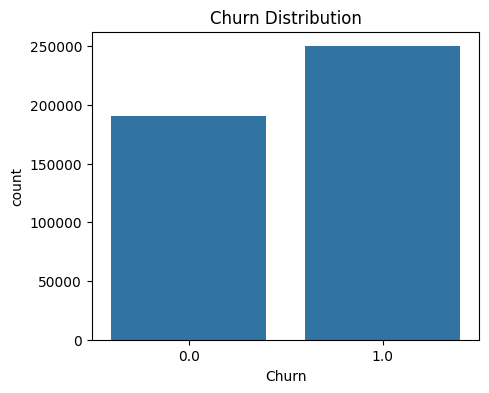

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()

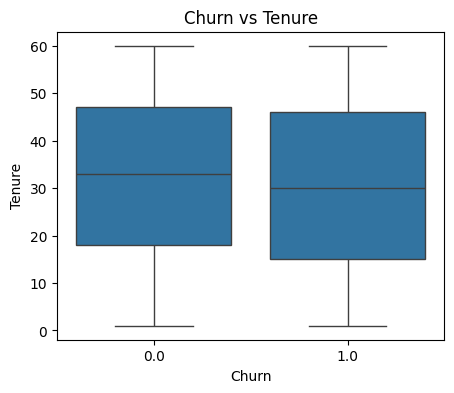

In [25]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x="Churn", y="Tenure")
plt.title("Churn vs Tenure")
plt.show()


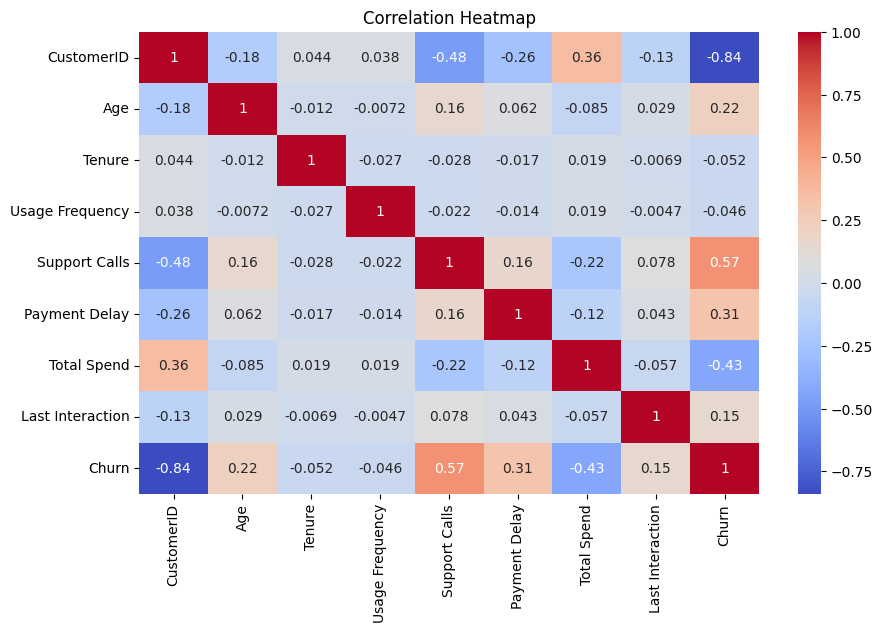

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
